# Lab 5: Model Selection for Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve


In this lab assignment, you will:

1. Load the Airbnb "listings" data set.
2. Train and test a logistic regression (LR) model using the scikit-learn default hyperparameter values.
2. Perform a grid search to identify the LR hyperparameter value that results in the best cross-validation score.
3. Fit the optimal model to the training data and make predictions on the test data.
4. Create a confusion matrix for both models.
5. Plot a precision-recall curve for both models.
6. Plot the ROC and compute the AUC for both models.
7. Perform feature selection.

**<font color='red'>Note: Some of the code cells in this notebook may take a while to run.</font>**

## Part 1: Load the Data Set

We will work with a preprocessed version of the Airbnb NYC "listings" data set. 

<b>Task</b>: In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`.

You will be working with the file named "airbnb_readytofit.csv.gz" that is located in a folder named "data".

In [2]:
# YOUR CODE HERE
filename = os.path.join(os.getcwd(), "data", "airbnb_readytofit.csv.gz")
df = pd.read_csv(filename, header=0)

## Part 2: Create Training and Test Data Sets

### Create Labeled Examples 

<b>Task</b>: Create labeled examples from DataFrame `df`. 
In the code cell below, carry out the following steps:

* Get the `host_is_superhost` column from DataFrame `df` and assign it to the variable `y`. This will be our label.
* Get all other columns from DataFrame `df` and assign them to the variable `X`. These will be our features. 

First, we will store the label column as a separate object, called `y`, and consequently remove that column from the `X` feature set:

In [3]:
# YOUR CODE HERE
y = df['host_is_superhost']
X = df.loc[:, df.columns != 'host_is_superhost']

### Split Labeled Examples Into Training and Test Sets

<b>Task</b>: In the code cell below, create training and test sets out of the labeled examples. 

1. Use scikit-learn's `train_test_split()` function to create the data sets.

2. Specify:
    * A test set that is 10 percent of the size of the data set.
    * A seed value of '1234'. 
    


In [4]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1234)

In [5]:
X_train.head()

,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,...,n_host_verifications,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
326,True,True,True,False,-0.868049,-2.706229,-0.120567,-0.120567,-0.470102,-0.337606,...,-0.083566,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
26890,True,False,True,False,0.578052,1.010024,-0.120567,-0.120567,0.605041,-0.337606,...,-1.562519,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
16767,True,True,True,False,0.578052,0.638399,-0.112284,-0.112284,-0.470102,-0.337606,...,1.395388,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
27743,True,True,True,True,0.288832,1.010024,-0.120567,-0.120567,2.755328,2.036990,...,-1.562519,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9783,True,False,True,False,0.578052,1.010024,-0.104000,-0.104000,0.605041,-0.337606,...,-1.069535,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## Part 3: Fit and Evaluate a Logistic Regression Model With Default Hyperparameter Values

<b>Task</b>: In the code cell below:

1. Using the scikit-learn `LogisticRegression` class, create a logistic regression model object with the following arguments: `max_iter=1000`. You will use the scikit-learn default value for hyperparameter $C$, which is 1.0. Assign the model object to the variable `model_default`.

2. Fit the model to the training data.

In [6]:
# 1. Create the  Scikit-learn LogisticRegression model object below and assign to variable 'model_default'
# YOUR CODE HERE
model_default = LogisticRegression(max_iter=1000)

# 2. Fit the model to the training data below
# YOUR CODE HERE
model_default.fit(X_test,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<b>Task:</b> Test your model on the test set (`X_test`). 

1. Use the ``predict_proba()`` method  to use the fitted model to predict class probabilities for the test set. Note that the `predict_proba()` method returns two columns, one column per class label. The first column contains the probability that an unlabeled example belongs to class `False` (`host_is_superhost` is "False") and the second column contains the probability that an unlabeled example belongs to class `True` (`host_is_superhost` is "True"). Save the values of the *second* column to a list called ``proba_predictions_default``.

2. Use the ```predict()``` method to use the fitted model `model_default` to predict the class labels for the test set. Store the outcome in the variable ```class_label_predictions_default```. Note that the `predict()` method returns the class label (True or False) per unlabeled example.

In [7]:
# 1. Make predictions on the test data using the predict_proba() method
# YOUR CODE HERE
proba_predictions_default = model_default.predict_proba(X_test)[:,1].tolist()

# 2. Make predictions on the test data using the predict() method
# YOUR CODE HERE
class_label_predictions_default = model_default.predict(X_test)

<b>Task</b>: Evaluate the accuracy of the model using a confusion matrix. In the cell below, create a confusion matrix out of `y_test` and `class_label_predictions_default`.

First, create the confusion matrix, then create a Pandas DataFrame out of the confusion matrix for display purposes.
Recall that we are predicting whether the host is a 'superhost' or not. Label the confusion matrix accordingly.

In [8]:
# YOUR CODE HERE

pd.DataFrame(
confusion_matrix(y_test, class_label_predictions_default, labels=[True, False]),
    columns=['Predicted: Is a superhost', 'Predicted: Is not a superhost'],
    index=['Actual: Is a superhost', 'Actual: Is not a superhost']
)

,Predicted: Is a superhost,Predicted: Is not a superhost
Actual: Is a superhost,284,431
Actual: Is not a superhost,110,1978


## Part 4: Perform Logistic Regression Model Selection Using `GridSearchSV`

Our goal is to find the optimal choice of hyperparameter $C$. 

### Set Up a Parameter Grid 

The code cell below creates a dictionary called `param_grid` with:
* a key called 'C' 
* a value which is a list consisting of 10 values for the hyperparameter $C$

It uses a scikit-learn function `11_min_c()` to assist in the creation of possible values for $C$. For more information, consult the online [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.l1_min_c.html).

In [9]:
from sklearn.svm import l1_min_c

cs = l1_min_c(X_train, y_train, loss="log") * np.logspace(0, 7, 16)
param_grid = dict(C = list(cs))
param_grid

{'C': [0.0001537633581917429,
  0.0004503182232067712,
  0.0013188220167462046,
  0.0038623609310518637,
  0.011311482347345912,
  0.03312731129440893,
  0.09701812016301883,
  0.28413159028558327,
  0.8321204375281983,
  2.436984996480532,
  7.137062864015964,
  20.901920364088983,
  61.214295464518635,
  179.2749136895258,
  525.0325015504883,
  1537.633581917429]}

### Perform Grid Search Cross-Validation

<b>Task:</b> Use `GridSearchCV` to search over the different values of hyperparameter $C$ to find the one that results in the best cross-validation (CV) score.

Complete the code in the cell below.

In [10]:
print('Running Grid Search...')

# 1. Create a LogisticRegression model object with the argument max_iter=1000. 
#    Save the model object to the variable 'model'
# YOUR CODE HERE
model = LogisticRegression(max_iter=1000)

# 2. Run a grid search with 5-fold cross-validation and assign the output to the 
# object 'grid'.
# YOUR CODE HERE
grid = GridSearchCV(model, param_grid, cv=5)

# 3. Fit the model on the training data and assign the fitted model to the 
#    variable 'grid_search'
# YOUR CODE HERE
grid_search = grid.fit(X_train, y_train)
print('Done')

Running Grid Search...
Done


<b>Task</b>: Retrieve the value of the hyperparameter $C$ for which the best score was attained. Save the result to the variable `best_c`.

In [11]:
grid_search.best_estimator_.C

525.0325015504883

In [12]:
# YOUR CODE HERE
best_c = 525.0325015504883

## Part 5: Fit and Evaluate the Optimal Logistic Regression Model 

<b>Task</b>: Initialize a `LogisticRegression` model object with the best value of hyperparameter `C` model and fit the model to the training data. The model object should be named `model_best`. Note: Supply `max_iter=1000` as an argument when creating the model object.

In [15]:
# 1. Create the  model object below and assign to variable 'model_best'
# YOUR CODE HERE
model_best = LogisticRegression(max_iter=1000, C=best_c)
# 2. Fit the model to the training data below
# YOUR CODE HERE
model_best.fit(X_train, y_train)

LogisticRegression(C=525.0325015504883, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<b>Task:</b> Test your model on the test set (`X_test`).

1. Use the ``predict_proba()`` method  to use the fitted model `model_best` to predict class probabilities for the test set. Save the values of the *second* column to a list called ``proba_predictions_best``.

2. Use the ```predict()``` method to use the fitted model `model_best` to predict the class labels for the test set. Store the outcome in the variable ```class_label_predictions_best```. 

In [16]:
# 1. Make predictions on the test data using the predict_proba() method
# YOUR CODE HERE
proba_predictions_best = model_best.predict_proba(X_test)[:,1].tolist()
# 2. Make predictions on the test data using the predict() method
# YOUR CODE HERE
class_label_predictions_best = model_best.predict(X_test)

<b>Task</b>: Evaluate the accuracy of the model using a confusion matrix. In the cell below, create a confusion matrix out of `y_test` and `class_label_predictions_best`.

In [18]:
# YOUR CODE HERE
pd.DataFrame(
confusion_matrix(y_test, class_label_predictions_best, labels=[True, False]),
        columns=['Predicted: Is a super host', 'Predicted: Is not a super host'],
        index=['Actual: Is a super host', 'Actual: Is not a super host']
)

,Predicted: Is a super host,Predicted: Is not a super host
Actual: Is a super host,270,445
Actual: Is not a super host,88,2000


## Part 6:  Plot Precision-Recall Curves for Both Models

<b>Task:</b> In the code cell below, use `precision_recall_curve()` to compute precision-recall pairs for both models.

For `model_default`:
* call `precision_recall_curve()` with `y_test` and `proba_predictions_default`
* save the output to the variables `precision_default`, `recall_default` and `thresholds_default`, respectively

For `model_best`:
* call `precision_recall_curve()` with `y_test` and `proba_predictions_best`
* save the output to the variables `precision_best`, `recall_best` and `thresholds_best`, respectively


In [22]:
precision_default, recall_default, thresholds_default = precision_recall_curve(y_test, proba_predictions_default)# YOUR CODE HERE
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, proba_predictions_best)# YOUR CODE HERE


In the code cell below, create two `seaborn` lineplots to visualize the precision-recall curve for both models. "Recall" will be on the $x$-axis and "Precision" will be on the $y$-axis. 

The plot for "default" should be green. The plot for the "best" should be red.


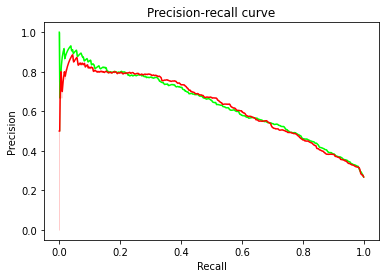

In [27]:
# YOUR CODE HERE
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=recall_default, y=precision_default, color='#00FF00')
sns.lineplot(x=recall_best, y=precision_best, color='#FF0000')

plt.title("Precision-recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

## Part 7: Plot ROC Curves and Compute the AUC for Both Models

You will next use scikit-learn's `roc_curve()` function to plot the receiver operating characteristic (ROC) curve and the `auc()` function to compute the area under the curve (AUC) for both models.

* An ROC curve plots the performance of a binary classifier for varying classification thresholds. It plots the fraction of true positives out of the positives vs. the fraction of false positives out of the negatives. For more information on how to use the `roc_curve()` function, consult the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html).

* The AUC measures the trade-off between the true positive rate and false positive rate. It provides a broad view of the performance of a classifier since it evaluates the performance for all the possible threshold values; it essentially provides a value that summarizes the the ROC curve. For more information on how to use the `auc()` function, consult the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html).

Let's first import the functions.

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

<b>Task:</b> Using the `roc_curve()` function, record the true positive and false positive rates for both models. 

1. Call `roc_curve()` with arguments `y_test` and `proba_predictions_default`. The `roc_curve` function produces three outputs. Save the three items to the following variables, respectively: `fpr_default` (standing for 'false positive rate'),  `tpr_default` (standing for 'true positive rate'), and `thresholds_default`.

2. Call `roc_curve()` with arguments `y_test` and `proba_predictions_best`. The `roc_curve` function produces three outputs. Save the three items to the following variables, respectively: `fpr_best` (standing for 'false positive rate'),  `tpr_best` (standing for 'true positive rate'), and `thresholds_best`.

In [29]:
fpr_default, tpr_default, thresholds_default = roc_curve(y_test, proba_predictions_default)# YOUR CODE HERE
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, proba_predictions_best)# YOUR CODE HERE

<b>Task</b>: Create <b>two</b> `seaborn` lineplots to visualize the ROC curve for both models. 

The plot for the default hyperparameter should be green. The plot for the best hyperparameter should be red.

* In each plot, the `fpr` values should be on the $x$-axis.
* In each plot, the`tpr` values should be on the $y$-axis. 
* In each plot, label the $x$-axis "False positive rate".
* In each plot, label the $y$-axis "True positive rate".
* Give each plot the title "Receiver operating characteristic (ROC) curve".
* Create a legend on each plot indicating that the plot represents either the default hyperparameter value or the best hyperparameter value.

<b>Note:</b> It may take a few minutes to produce each plot.

#### Plot ROC Curve for Default Hyperparameter:

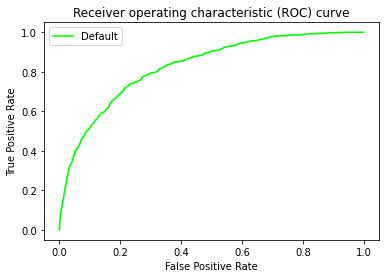

In [37]:
# YOUR CODE HERE
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=fpr_default, y=tpr_default, color='#00FF00')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(['Default'])
plt.show()

#### Plot ROC Curve for Best Hyperparameter:

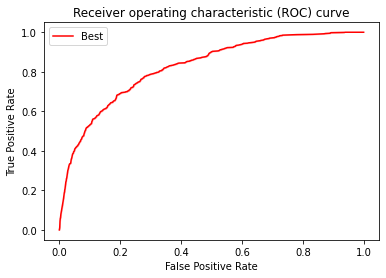

In [38]:
# YOUR CODE HERE
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=fpr_best, y=tpr_best, color='#FF0000')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(['Best'])
plt.show()

<b>Task</b>: Use the `auc()` function to compute the area under the receiver operating characteristic (ROC) curve for both models.

For each model, call the function with the `fpr` argument first and the `tpr` argument second. 

Save the result of the `auc()` function for `model_default` to the variable `auc_default`.
Save the result of the `auc()` function for `model_best` to the variable `auc_best`. 
Compare the results.

In [39]:
# YOUR CODE HERE
auc_default = auc(fpr_default, tpr_default)
auc_best = auc(fpr_best, tpr_best)

print(auc_default)
print(auc_best)

0.8273390402700748
0.8242651984031294


## Deep Dive: Feature Selection Using SelectKBest

In the code cell below, you will see how to use scikit-learn's `SelectKBest` class to obtain the best features in a given data set using a specified scoring function. For more information on how to use `SelectKBest`, consult the online [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html).

We will extract the best 5 features from the Airbnb "listings" data set to create new training data, then fit our model with the optimal hyperparameter $C$ to the data and compute the AUC. Walk through the code to see how it works and complete the steps where prompted. Analyze the results.

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Note that k=5 is specifying that we want the top 5 features
selector = SelectKBest(f_classif, k=9)
selector.fit(X, y)
filter = selector.get_support()
top_5_features = X.columns[filter]

print("Best 5 features:")
print(top_5_features)

# Create new training and test data for features
new_X_train = X_train[top_5_features]
new_X_test = X_test[top_5_features]


# Initialize a LogisticRegression model object with the best value of hyperparameter C 
# The model object should be named 'model'
# Note: Supply max_iter=1000 as an argument when creating the model object
# YOUR CODE HERE
model = LogisticRegression(max_iter=1000, C=best_c)

# Fit the model to the new training data
# YOUR CODE HERE
model.fit(new_X_train, y_train)

# Use the predict_proba() method to use your model to make predictions on the new test data 
# Save the values of the second column to a list called 'proba_predictions'
# YOUR CODE HERE
proba_predictions = model.predict_proba(new_X_test)[:,1].tolist()
    
# Compute the auc-roc
fpr, tpr, thresholds = roc_curve(y_test, proba_predictions)
auc_result = auc(fpr, tpr)
print(auc_result)

Best 5 features:
Index(['host_response_rate', 'host_acceptance_rate', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')
0.8120465262706642


<b>Task</b>: Consider the results. Change the specified number of features and re-run your code. Does this change the AUC value? What number of features results in the best AUC value? Record your findings in the cell below.

Changing the features does change the AUC value, and it appears to be that 9 holds the best AUC value with 0.812. Before and after nine, the AUC reveals diminishing results.